<a href="https://colab.research.google.com/github/20250166/PictureBook_Project_Group1/blob/main/3_group1_ccw_wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐹🐾 <font color = 'green'>>**Converting compiled .txt to csv:** <font color = 'pink'>_This stage can be skipped if you have already done it_.

In [ ]:
!pip install pandas
!pip install lexical_diversity
import pandas as pd #Import Pandas Package
import lexical_diversity as ld
import glob

#Cloning your repository and set up your current working directory 🍎🍎🍎🍎🍎
!git clone https://github.com/20250166/PictureBook_Project_Group1
%cd /content/PictureBook_Project_Group1/Data_Frame

# Load all .txt files of your current working directory
fns = glob.glob('*.txt')

# List to hold each temporary DataFrame
df_list = []

# Load each file and append to list
for fn in fns:
    dftmp = pd.read_csv(fn, sep='@')
    df_list.append(dftmp)

# Concatenate all and reset index
df = pd.concat(df_list, ignore_index=True)

# Save as CSV 🍎🍎🍎🍎🍎
df.to_csv("./3creators_6books.csv", index=False)

# Display the DataFrame
print(df)
df



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 2.6 MB/s eta 0:00:00
Cloning into 'PictureBook_Project_Group1'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (122/122), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 122 (delta 51), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (122/122), 2.76 MiB | 5.03 MiB/s, done.
Resolving deltas: 100% (51/51), done.
/content/PictureBook_Project_Group1/Data_Frame
                                                text  \
0  mrs rachel lynde lived just where the avonlea ...   
1  it was a clear apple green evening in may and ...   
2  alice was beginning to get very tired of sitti...   
3  child of the pure unclouded brow     and dream...   
4  the emperor's new clothes  many years ago ther...   
5  in china you must know the emperor is a chinam...   

                       title               creator  
0       anne of green gables  lucy maud montgomery  
1              

,text,title,creator
0,mrs rachel lynde lived just where the avonlea ...,anne of green gables,lucy maud montgomery
1,it was a clear apple green evening in may and ...,rainbow vally,lucy maud montgomery
2,alice was beginning to get very tired of sitti...,alice in wonderland,lewis carroll
3,child of the pure unclouded brow and dream...,through the looking glass,lewis carroll
4,the emperor's new clothes many years ago ther...,andersen's fairytales,hans asdersen
5,in china you must know the emperor is a chinam...,the nightingale,hans asdersen


In [ ]:
import pandas as pd
from lexical_diversity import lex_div as ld

# Load the CSV (skip if already loaded) 🍎🍎🍎🍎🍎
df = pd.read_csv("./3creators_6books.csv", sep=",")

# <font color = 'blue'> **Getting TTR and MATTR** (based on N_tokens and N_lemmas) including ['Data Size] using len( )

In [ ]:
!pip install textstat
import textstat

# Added column: String length for estimating data size
length = []

for i in range(0, len(df['text'])):
  LEN = len(df['text'][i])
  length.append(LEN)

df['Data size'] = length


# Added columns:  Number of Splitted words & Length of splitted words
tsplit = []
splen = []

for i in range(0, len(df['text'])):
  TSP = df['text'][i].split()
  SPLEN = len(TSP)
  tsplit.append(TSP)
  splen.append(SPLEN)

df['Splits'] = tsplit
df['N_Splits'] = splen

# Added column: Lemma 표제어
#df['Lemma'] is a column from a pandas DataFrame, so len(df['Lemma']) gives you the number of rows (or entries) in that column.
lemma = []

for i in range(0, len(df['text'])):
  LEM = ld.flemmatize(df['text'][i])
  print(LEM)
  lemma.append(LEM)

df['Lemma'] = lemma


# ADD Lexical Diversity indices

#1. Create two empty lists--one for Type to Token Ratio and the other Moving Average Type to Token Ratio.
TTR = []
MATTR = []

#2. Getting LD index values for each cell:

for i in range(0, len(df['Lemma'])):
  flt = df['Lemma'][i]
  ttr = ld.ttr(flt)
  mattr = ld.mattr(flt)

  #2-1. Add values to each list
  TTR.append(ttr)
  MATTR.append(mattr)


#3. Add columns for TTR and MATTR
df['TTR'] = TTR
df['MATTR'] = MATTR

print(df)
df_selected = df[['creator','N_Splits','MATTR']]
df_selected



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.6 MB/s eta 0:00:00
['mrs', 'rachel', 'lynde', 'live', 'just', 'where', 'the', 'avonlea', 'main', 'road', 'dip', 'down', 'into', 'a', 'little', 'hollow', 'fringed', 'with', 'alder', 'and', 'lady', 'eardrops', 'and', 'traverse', 'by', 'a', 'brook', 'that', 'have', 'its', 'source', 'away', 'back', 'in', 'the', 'wood', 'of', 'the', 'old', 'cuthbert', 'place', 'it', 'be', 'reputed', 'to', 'be', 'a', 'intricate', 'headlong', 'brook', 'in', 'its', 'early', 'course', 'through', 'that', 'wood', 'with', 'dark', 'secret', 'of', 'pool', 'and', 'cascade', 'but', 'by', 'the', 'time', 'it', 'reach', 'lyndes', 'hollow', 'it', 'be', 'a', 'quiet', 'well', 'conduct', 'little', 'stream', 'for', 'not', 'even', 'a', 'brook', 'could', 'run', 'past', 'mrs', 'rachel', 'lyndes', 'door', 'without'

,creator,N_Splits,MATTR
0,lucy maud montgomery,103252,0.803898
1,lucy maud montgomery,81902,0.801327
2,lewis carroll,26680,0.778273
3,lewis carroll,29926,0.789937
4,hans asdersen,56058,0.767542
5,hans asdersen,3630,0.754342


# <font color = 'green'> **MATTR for each creator** (average across different volumes for each creator)

In [ ]:
# Clean up creator names
df['creator'] = df['creator'].str.strip().str.lower()

df_creator_ld = df.groupby("creator")['MATTR'].mean().reset_index()
df_creator_ld = df_creator_ld.round(6)

# --- STEP 6: Save and display results ---
df_creator_ld.to_csv('LD_by_creator.csv', index=False)
print("✅ Lexical diversity by creator saved as 'LD_by_creator.csv'!\n")
df_creator_ld

✅ Lexical diversity by creator saved as 'LD_by_creator.csv'!



,creator,MATTR
0,hans asdersen,0.760942
1,lewis carroll,0.784105
2,lucy maud montgomery,0.802612


#<font color = 'red'> **Common Core Words for all 2 creators saved in a single .csv file**

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from collections import Counter

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Load the dataset 🍎🍎🍎🍎🍎
file_path = "/content/PictureBook_Project_Group1/Data_Frame/3creators_6books.csv"  # Change to your actual file name/content/pg_5authors_16books.csv
df_ccw = pd.read_csv(file_path)
# Ensure the text column exists
if 'text' not in df_ccw.columns or 'creator' not in df_ccw.columns:
    raise ValueError("CSV file must contain 'text' and 'creator' columns.")

# Combine all text data into one large string
all_text = " ".join(df_ccw['text'].astype(str))

# Tokenize words
words = word_tokenize(all_text.lower())  # Convert to lowercase

# Remove punctuation and stopwords
stop_words = set(stopwords.words('english'))
words = [word for word in words if word.isalpha() and word not in stop_words]  # Keep only words, no numbers/symbols

# Count word frequencies
word_counts = Counter(words)

# Convert to a DataFrame
common_words_df = pd.DataFrame(word_counts.most_common(100), columns=['Word', 'Frequency'])  # Top 100 words

# Save to CSV 🍎🍎🍎🍎🍎
common_words_df.to_csv("3creators_common_core_words.csv", index=False)

print("Common core words extracted and saved as '3creators_common_core_words.csv'!")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Common core words extracted and saved as '3creators_common_core_words.csv'!


# <font color = 'sky blue'> **Creating a word cloud** based on Common Core Words(CCW)

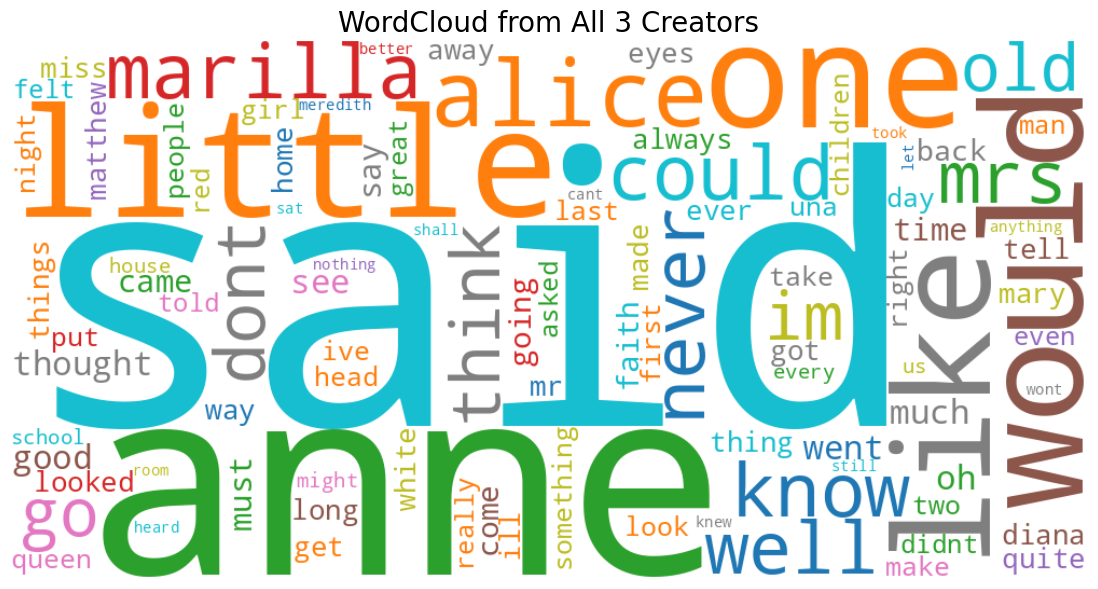

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Path to the combined CSV file (not a folder)🍎🍎🍎🍎🍎
input_file = "/content/PictureBook_Project_Group1/Data_Frame/3creators_common_core_words.csv"

# Read the CSV containing word-frequency pairs
df = pd.read_csv(input_file)

# Convert to dictionary: {'word1': freq1, 'word2': freq2, ...}
word_freq = dict(zip(df['Word'], df['Frequency']))

# Create and generate the word cloud
wc = WordCloud(width=1000, height=500, background_color='white', colormap='tab10')
wc.generate_from_frequencies(word_freq)

# Display the word cloud inline in Colab
plt.figure(figsize=(15, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud from All 3 Creators", fontsize=20)
plt.show()